##INTRODUCTION
/PROBLEM STATEMENT


Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

##FEATURES

Loan_ID	: Loan_ID refers to the (unique ID)	 Loan reference number, though there is direct impact to the approval of the loan but this necessary in the form filling process it is helpful for record keeping.example LP001002; LP001003; ...

                   
Gender: Gender refers to the Applicant gender example  Male; Female


Married : This column help us identify applicant's marital status.It is one of the important feature. Example Married; Not Married


Dependents: Gives us the idea of  Number of family members example 0; 1; 2; 3+


Education: This is one of the important features checking  Applicant's education/qualification. example	Graduate; Under Graduate


Self_Employed: This refers to 	Applicant employment status(yes for self-employed, no for employed/others)


ApplicantIncome: Refers to Applicant's monthly salary/income	5849; 4583; ...


CoapplicantIncome: Refers to the	Additional applicant's monthly salary/income	1508; 2358; ...


LoanAmount: Refers to the amount of loan the individual is asking for. example	Loan amount	128; 66; ...


Loan_Amount_Term: This refers to 	the loan's repayment period (in months)	360; 120; ...


Credit_History: a very important feature that 	Records of previous credit history(0: bad credit history, 1: good credit history)	0; 1


Property_Area:Refers to the location of property (Rural/Semiurban/Urban)


Loan_Status	Status of loan: The dependent variable
(Y: accepted, N: not accepted)	Y; N


Importing the Dependencies

In [1]:
import numpy as np # for linear algebra still what use in this
import pandas as pd  # data processing, reading and modifying datasets and dataframes
import matplotlib.pyplot as plt # plotting the graphs
import seaborn as sns #different charts
import warnings
warnings.filterwarnings('ignore') #running this will list all files under the input directory
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
print('Libraries Imported')

from sklearn.metrics import accuracy_score

Libraries Imported


Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("C:/Users/dell/OneDrive/Documents/PROJECT/archive (2)/train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# printing the first 5 rows of the dataframe
loan_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Our numerical variables are:
 Applicant Income, CoapplicantIncome, LoanAmount, Loan amount term, credit history.

#Our categorical variables are:
Loan ID,Gender,Married,Dependents,Education, Self employed,Property Area,Loan Status7

In [6]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    # number of rows and columns
loan_dataset.shape

(614, 13)

In [7]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#EDA

In [8]:
# Step 1: Total income
df1 = loan_dataset.copy()
df1['Total_Income'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']

# Step 2: EMI ratio (Loan amount in thousands, so divide Total_Income by 1000)
df1['EMI_Ratio'] = df1['LoanAmount'] * 1000 / (df1['Total_Income'] + 1)  # Add 1 to avoid division by zero

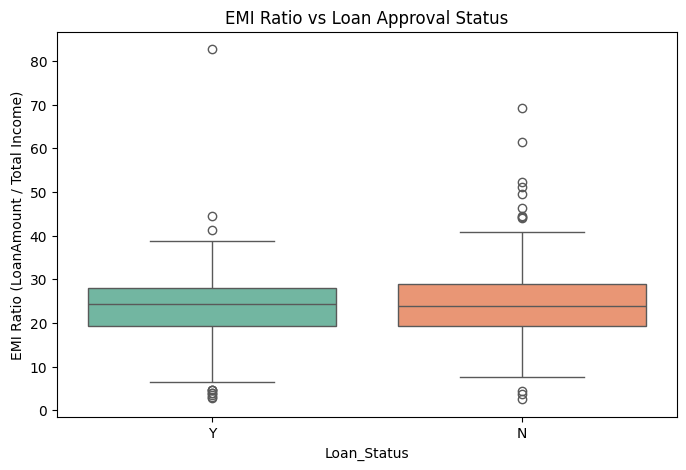

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x='Loan_Status', y='EMI_Ratio', palette='Set2')
plt.title('EMI Ratio vs Loan Approval Status')
plt.ylabel('EMI Ratio (LoanAmount / Total Income)')
plt.show()

On average, EMI ratio is similar for both approved and rejected loans.

But very high EMI ratios (above ~40–50) appear more often in rejected cases — indicating riskier profiles.

EMI ratio alone may not determine approval, but high values can hurt chances..

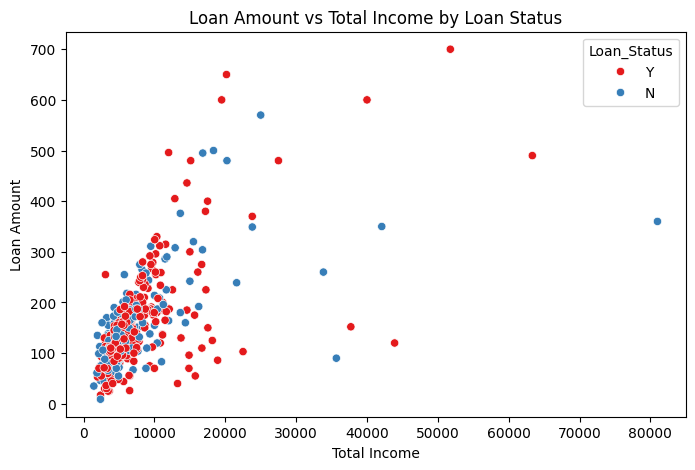

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df1, x='Total_Income', y='LoanAmount', hue='Loan_Status', palette='Set1')
plt.title('Loan Amount vs Total Income by Loan Status')
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')
plt.show()

Loan approval seems to favor applicants with moderate income and moderate loan amounts.

Rejected cases often involve high loan demand relative to income, which likely affects EMI burden and risk assessment.

The plot supports the idea that income-to-loan balance matters more than income or loan alone.

In [11]:
df = loan_dataset

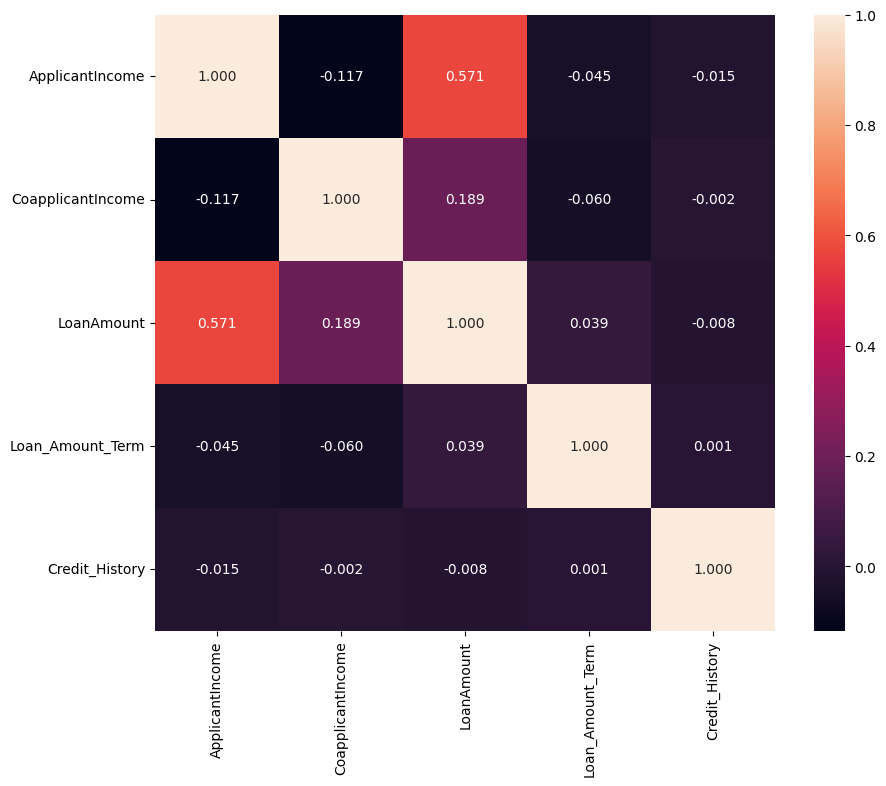

In [12]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f")
plt.show()

#missing value imputation

In [13]:
# number of missing values in each column
loan_dataset.isnull().sum()  # what is dtype: int64

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Dropping the missing values

In [14]:
# Categorical columns
loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0], inplace=True)
loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0], inplace=True)
loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0], inplace=True)
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0], inplace=True)

# Numerical columns
loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].median(), inplace=True)
loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mode()[0], inplace=True)
loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0], inplace=True)


In [15]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#outliers

The max (₹81,000) is 14× the median (₹3,812) and way beyond the 75th percentile.

But since income can vary widely (e.g., doctors, consultants), this may be a valid high earner, not noise.

FEATURE ENGINEERING

In [16]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Loan_Status' : {'Y' : 1 , 'N' : 0},'Dependents':{'3+':4}},inplace=True)

In [17]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [18]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [19]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


In [21]:
models = [LogisticRegression(max_iter = 1000),SVC(kernel = 'linear'), DecisionTreeClassifier(),RandomForestClassifier()]

In [22]:
def compare_models_train_test():
  for model in models:

    #training the model
    model.fit(X_train,Y_train)

    #evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(Y_test, test_data_prediction)
    print('accuracy score of the ', model ,'model', '=', accuracy )

In [23]:
compare_models_train_test()

accuracy score of the  LogisticRegression(max_iter=1000) model = 0.8387096774193549
accuracy score of the  SVC(kernel='linear') model = 0.7903225806451613
accuracy score of the  DecisionTreeClassifier() model = 0.7258064516129032
accuracy score of the  RandomForestClassifier() model = 0.8225806451612904


In [24]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model,X,Y,cv = 5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)
    print('cross validation acuracies for', model, '=', cv_score)
    print('accuracy score of the ',model,mean_accuracy)
    print('..............................................')

In [25]:
compare_models_cross_validation()

cross validation acuracies for LogisticRegression(max_iter=1000) = [0.81300813 0.77235772 0.7804878  0.84552846 0.81147541]
accuracy score of the  LogisticRegression(max_iter=1000) 80.46
..............................................
cross validation acuracies for SVC(kernel='linear') = [0.80487805 0.77235772 0.76422764 0.80487805 0.82786885]
accuracy score of the  SVC(kernel='linear') 79.48
..............................................
cross validation acuracies for DecisionTreeClassifier() = [0.75609756 0.68292683 0.7398374  0.72357724 0.7295082 ]
accuracy score of the  DecisionTreeClassifier() 72.64
..............................................
cross validation acuracies for RandomForestClassifier() = [0.7804878  0.75609756 0.76422764 0.82926829 0.78688525]
accuracy score of the  RandomForestClassifier() 78.34
..............................................


##confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

Classification Report for the LogisticRegression model:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        19
           1       0.81      1.00      0.90        43

    accuracy                           0.84        62
   macro avg       0.91      0.74      0.77        62
weighted avg       0.87      0.84      0.82        62

Confusion Matrix for the LogisticRegression model:
[[ 9 10]
 [ 0 43]]
Sensitivity for the LogisticRegression model: 1.0
Specificity for the LogisticRegression model: 0.47368421052631576
AUC-ROC for the LogisticRegression model: 0.8053855569155447


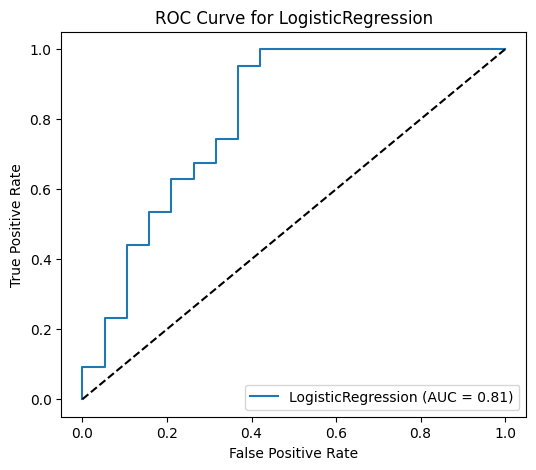


Classification Report for the SVC model:
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        19
           1       0.77      1.00      0.87        43

    accuracy                           0.79        62
   macro avg       0.88      0.66      0.67        62
weighted avg       0.84      0.79      0.75        62

Confusion Matrix for the SVC model:
[[ 6 13]
 [ 0 43]]
Sensitivity for the SVC model: 1.0
Specificity for the SVC model: 0.3157894736842105
AUC-ROC for the SVC model: 0.7429620563035496


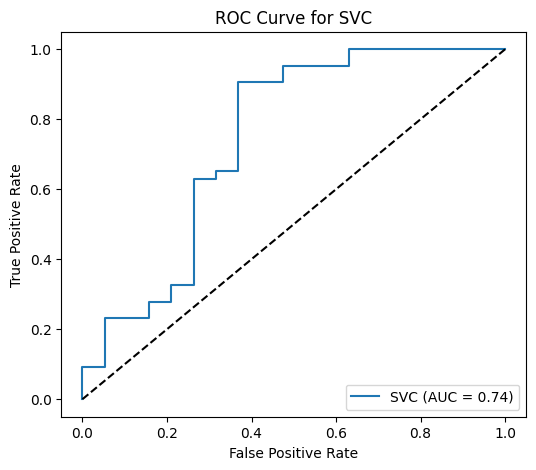


Classification Report for the DecisionTreeClassifier model:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56        19
           1       0.81      0.79      0.80        43

    accuracy                           0.73        62
   macro avg       0.68      0.68      0.68        62
weighted avg       0.73      0.73      0.73        62

Confusion Matrix for the DecisionTreeClassifier model:
[[11  8]
 [ 9 34]]
Sensitivity for the DecisionTreeClassifier model: 0.7906976744186046
Specificity for the DecisionTreeClassifier model: 0.5789473684210527
AUC-ROC for the DecisionTreeClassifier model: 0.6848225214198287


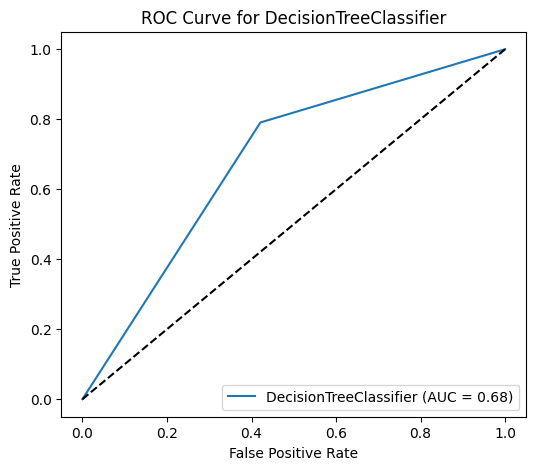


Classification Report for the RandomForestClassifier model:
              precision    recall  f1-score   support

           0       0.83      0.53      0.65        19
           1       0.82      0.95      0.88        43

    accuracy                           0.82        62
   macro avg       0.83      0.74      0.76        62
weighted avg       0.82      0.82      0.81        62

Confusion Matrix for the RandomForestClassifier model:
[[10  9]
 [ 2 41]]
Sensitivity for the RandomForestClassifier model: 0.9534883720930233
Specificity for the RandomForestClassifier model: 0.5263157894736842
AUC-ROC for the RandomForestClassifier model: 0.7986536107711137


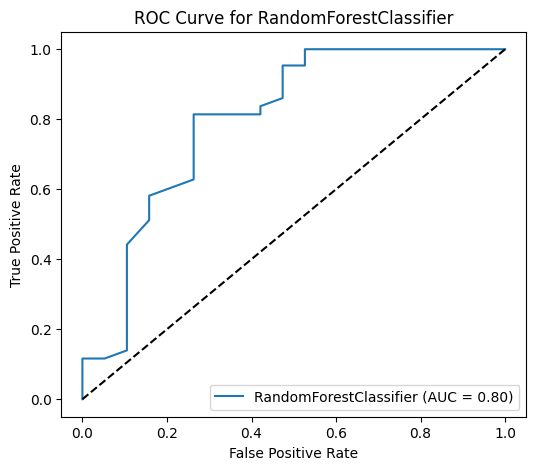

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(max_iter=1000), SVC(kernel='linear', probability=True), DecisionTreeClassifier(), RandomForestClassifier()]

def compare_models_train_test():
    for model in models:
        # Training the model
        model.fit(X_train, Y_train)

        # Predicting the test data
        test_data_prediction = model.predict(X_test)
        test_data_probabilities = model.predict_proba(X_test)[:, 1]  # For AUC-ROC, we need probabilities for the positive class

        # Printing the classification report (precision, recall, f1-score)
        print(f'Classification Report for the {model.__class__.__name__} model:')
        print(classification_report(Y_test, test_data_prediction))

        # Confusion Matrix
        cm = confusion_matrix(Y_test, test_data_prediction)
        print(f'Confusion Matrix for the {model.__class__.__name__} model:')
        print(cm)

        # Calculating Sensitivity (Recall for the positive class)
        sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # TP / (FN + TP)
        print(f'Sensitivity for the {model.__class__.__name__} model: {sensitivity}')

        # Calculating Specificity
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN / (TN + FP)
        print(f'Specificity for the {model.__class__.__name__} model: {specificity}')

        # Calculating AUC-ROC
        auc_roc = roc_auc_score(Y_test, test_data_probabilities)
        print(f'AUC-ROC for the {model.__class__.__name__} model: {auc_roc}')

        # Plotting ROC Curve
        fpr, tpr, thresholds = roc_curve(Y_test, test_data_probabilities)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_roc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model.__class__.__name__}')
        plt.legend(loc='lower right')
        plt.show()

        print()

compare_models_train_test()